In [122]:
import os
import tensorflow as tf
import numpy as np
import json

SEED = 1234
tf.random.set_seed(SEED)

In [123]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

apply_data_augmentation = False

if apply_data_augmentation:
    train_data_gen = ImageDataGenerator(rotation_range=10,
                                       width_shift_range=10,
                                       height_shift_range=10,
                                       zoom_range=0.3,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       fill_mode='constant',#when we flip, rotate, we introduce new pixels and we must set a way on how to fill
                                       cval=0,
                                       rescale=1/255.)

else:
    train_data_gen = ImageDataGenerator(rescale=1/255.)
    


In [124]:
cwd = os.path.join(os.path.dirname(os.getcwd()),"artificial-neural-networks-and-deep-learning-2020/MaskDataset/")

dataset_dir = os.path.join(cwd, "training/")


In [125]:
path = os.getcwd()
print ("The current working directory is %s" % dataset_dir)

The current working directory is C:\Users\ASUS\Documents\Università\ANNDL\artificial-neural-networks-and-deep-learning-2020/MaskDataset/training/


In [126]:
with open(os.path.join(cwd,'train_gt.json')) as f:
  myJson = json.load(f)
print(myJson)

{'14985.jpg': 0, '13358.jpg': 0, '10210.jpg': 0, '18202.jpg': 0, '14962.jpg': 0, '13243.jpg': 0, '11116.jpg': 0, '14251.jpg': 0, '15818.jpg': 0, '15552.jpg': 0, '16795.jpg': 0, '15952.jpg': 0, '11918.jpg': 0, '11657.jpg': 0, '11150.jpg': 0, '14006.jpg': 0, '11271.jpg': 0, '10935.jpg': 0, '16664.jpg': 0, '15919.jpg': 0, '14038.jpg': 0, '18138.jpg': 0, '13709.jpg': 0, '10410.jpg': 0, '11966.jpg': 0, '12230.jpg': 0, '16157.jpg': 0, '13944.jpg': 0, '17170.jpg': 0, '16603.jpg': 0, '16910.jpg': 0, '14724.jpg': 0, '13580.jpg': 0, '17098.jpg': 0, '10634.jpg': 0, '15741.jpg': 0, '11158.jpg': 0, '16290.jpg': 0, '16503.jpg': 0, '12982.jpg': 0, '12581.jpg': 0, '13975.jpg': 0, '13113.jpg': 0, '12834.jpg': 0, '18002.jpg': 0, '16344.jpg': 0, '12968.jpg': 0, '14342.jpg': 0, '13133.jpg': 0, '12859.jpg': 0, '15476.jpg': 0, '14589.jpg': 0, '13468.jpg': 0, '14427.jpg': 0, '13787.jpg': 0, '10603.jpg': 0, '18004.jpg': 0, '16903.jpg': 0, '15523.jpg': 0, '18030.jpg': 0, '12960.jpg': 0, '14212.jpg': 0, '10172.

for key in myJson:
    os.rename(os.path.join(dataset_dir,key), dataset_dir+'/'+str(myJson[key])+'/'+key)

In [127]:
bs=1

train_gen = train_data_gen.flow_from_directory(dataset_dir,
                                               target_size=(256,256),
                                              color_mode='rgb',
                                              batch_size=bs,
                                              class_mode='categorical',
                                              shuffle=True,
                                              seed=SEED)


Found 5614 images belonging to 3 classes.


In [128]:
img_h = 256
img_w = 256

num_classes = 3


train_dataset = tf.data.Dataset.from_generator(lambda: train_gen,
                                              output_types=(tf.float32,tf.float32),
                                              output_shapes=([None,256,256,3],[None,num_classes]))

train_dataset=train_dataset.repeat()


In [129]:
import matplotlib.pyplot as plt

iterator = iter(train_dataset)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

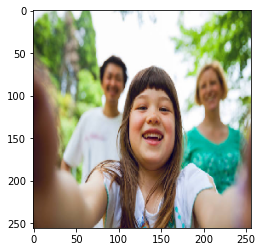

In [130]:
augmented_img, target = next(iterator)
augmented_img = np.array(augmented_img[0])
augmented_img = augmented_img * 255

plt.imshow(np.uint8(augmented_img))
plt.plot

In [131]:
start_f = 8
depth = 5

model = tf.keras.Sequential()
for i in range(depth):
    if i == 0:
        input_shape = [img_h,img_w,3]
    else:
        input_shape = [None]
    
    model.add(tf.keras.layers.Conv2D(filters=start_f,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    padding='same',
                                    input_shape=input_shape))
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    start_f *=2
    
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 256, 256, 8)       224       
_________________________________________________________________
re_lu_24 (ReLU)              (None, 256, 256, 8)       0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 128, 128, 16)      1168      
_________________________________________________________________
re_lu_25 (ReLU)              (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 32)       

In [132]:
loss = tf.keras.losses.CategoricalCrossentropy()

lr = 1e-4

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss , metrics=metrics)

In [133]:
from datetime import datetime

cwd = 'C:/Users/ASUS/Documents/Università/ANNDL'

exps_dir = os.path.join(cwd, 'classification_experiments_')
if not os.path.exists(exps_dir):
    os.makedirs(exps_dir)

now = datetime.now().strftime('%b%d_%H-%M-%S')

exp_name='FC'

exp_dir = os.path.join(exps_dir, exp_name + '_' + str(now))
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)
    
callbacks = []

ckpt_dir = os.path.join(exp_dir, 'ckpts')
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)
    
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir,'cp.ckpt'),save_weights_only=True)

#callbacks.append(ckpt_callback)


tb_dir = os.path.join(exp_dir, 'tb_logs')
if not os.path.exists(tb_dir):
    os.makedirs(tb_dir)
tb_callback=tf.keras.callbacks.TensorBoard(log_dir=tb_dir,histogram_freq=1)


# By default shows losses and metrics for both training and validation
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir,
                                             profile_batch=0,
                                             histogram_freq=1)  # if 1 shows weights histograms
callbacks.append(tb_callback)

# Early Stopping
# --------------
early_stop = True
if early_stop:
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    callbacks.append(es_callback)


In [134]:
model.fit(x=train_dataset,
         epochs=1,
         steps_per_epoch=len(train_gen),
         callbacks=callbacks)

Train for 5614 steps
5614/5614 [==============================] - 347s 62ms/step - loss: 1.0998 - accuracy: 0.3523


tf.Tensor([[0.3109356  0.38245326 0.3066112 ]], shape=(1, 3), dtype=float32)


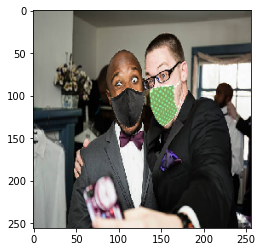

In [141]:
from datetime import datetime

def create_csv(results, results_dir='./'):

    csv_fname = 'results_'
    csv_fname += datetime.now().strftime('%b%d_%H-%M-%S') + '.csv'

    with open(os.path.join(results_dir, csv_fname), 'w') as f:

        f.write('Id,Category\n')

        for key, value in results.items():
            f.write(key + ',' + str(value) + '\n')

            
augmented_img, target = next(iterator)
augmented_img = np.array(augmented_img[0])
augmented_img = augmented_img * 255

plt.imshow(np.uint8(augmented_img))
plt.plot

print(model(next(iterator)))



In [140]:
 
from PIL import Image
# ....

image_filenames = next(os.walk('../Classification_Dataset/test))[2]

results = {}
for image_name in image_filenames:

   img = Image.open('.../test/img_name').convert('RGB')
   img_array = np.array(img)
   img_array = np.expand_dims(img_array, 0) 
   ....
   data_normalization...
   ....
   prediction = argmax(softmax)   # predicted class
   .....
   results[image_name] = prediction

create_csv(results)

SyntaxError: EOL while scanning string literal (<ipython-input-140-670948ab31a8>, line 4)